In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [48]:
df = pd.read_csv('unicorn_companies.csv')
df.head()

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,$140.00,4/7/17,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.30,12/1/12,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95.00,1/23/14,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.60,12/12/11,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40.00,1/8/18,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


Check the features' datatypes

In [49]:
df.dtypes

Company             object
Valuation ($B)      object
Date Added          object
Country             object
Category            object
Select Investors    object
dtype: object

Based on the data in the set, we can transform Valuation and Date Added to float and date formats respectively to have more flexibility in the available manipulations.

In [50]:
df['Valuation ($B) '] = df['Valuation ($B) '].str.replace('$','').astype('float')
df['Date Added'] = pd.to_datetime(df['Date Added'])
df.dtypes

/var/folders/4k/p82h_fr17cj28l5580_79wp80000gn/T/ipykernel_2502/1974450614.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation ($B) '] = df['Valuation ($B) '].str.replace('$','').astype('float')


Company                     object
Valuation ($B)             float64
Date Added          datetime64[ns]
Country                     object
Category                    object
Select Investors            object
dtype: object

To do analysis based on the investors, let's unnest Select Investors column and create a new dataframe.

In [51]:
df['Select Investors'] = df['Select Investors'].str.split(', ')
df_investors = df.explode('Select Investors').reset_index(drop=True)
df_investors.head(10)

,Company,Valuation ($B),Date Added,Country,Category,Select Investors
0,Bytedance,140.0,2017-04-07,China,Artificial intelligence,Sequoia Capital China
1,Bytedance,140.0,2017-04-07,China,Artificial intelligence,SIG Asia Investments
2,Bytedance,140.0,2017-04-07,China,Artificial intelligence,Sina Weibo
3,Bytedance,140.0,2017-04-07,China,Artificial intelligence,Softbank Group
4,SpaceX,100.3,2012-12-01,United States,Other,Founders Fund
5,SpaceX,100.3,2012-12-01,United States,Other,Draper Fisher Jurvetson
6,SpaceX,100.3,2012-12-01,United States,Other,Rothenberg Ventures
7,Stripe,95.0,2014-01-23,United States,Fintech,Khosla Ventures
8,Stripe,95.0,2014-01-23,United States,Fintech,LowercaseCapital
9,Stripe,95.0,2014-01-23,United States,Fintech,capitalG


Let's check categorical values to make sure there are no mistakes.

In [52]:
print(df['Category'].unique(), '\n Unique number of Category values',len(df['Category'].unique()))

['Artificial intelligence' 'Other' 'Fintech'
 'Internet software & services' 'Supply chain, logistics, & delivery'
 'Data management & analytics' 'Edtech' 'E-commerce & direct-to-consumer'
 'Hardware' 'Auto & transportation' 'Health' 'Consumer & retail'
 'Finttech' 'Travel' 'Cybersecurity' 'Mobile & telecommunications'
 'Artificial Intelligence'] 
 17


We have two pair of ligically equal values with some mistakes in spelling:
- 'Artificial intelligence' / 'Artificial Intelligence'
- 'Fintech' / 'Finttech'

Let's replace them with uniform values.

In [53]:
df['Category'] = df['Category'].replace('Artificial intelligence', 'Artificial Intelligence')
df['Category'] = df['Category'].replace('Finttech', 'Fintech')
print(df['Category'].unique(), '\n Unique number of Category values after cleansing',len(df['Category'].unique()))

['Artificial Intelligence' 'Other' 'Fintech'
 'Internet software & services' 'Supply chain, logistics, & delivery'
 'Data management & analytics' 'Edtech' 'E-commerce & direct-to-consumer'
 'Hardware' 'Auto & transportation' 'Health' 'Consumer & retail' 'Travel'
 'Cybersecurity' 'Mobile & telecommunications'] 
 15


Same with the countries:

In [54]:
print(df['Country'].unique(), '\n Unique number of Country values',len(df['Country'].unique()))
df['Country'] = df['Country'].replace('United States,', 'United States')
df['Country'] = df['Country'].replace('Indonesia,', 'Indonesia')
print('\n Unique number of Country values after cleansing',len(df['Country'].unique()))

['China' 'United States' 'Sweden' 'Australia' 'United Kingdom' 'Brazil'
 'Hong Kong' 'India' 'Singapore' 'Germany' 'Mexico' 'Indonesia' 'Canada'
 'Turkey' 'South Korea' 'Netherlands' 'Israel' 'Colombia' 'Belgium'
 'Estonia' 'Lithuania' 'France' 'Austria' 'Ireland' 'Vietnam'
 'United Arab Emirates' 'Switzerland' 'Argentina' 'Japan' 'Luxembourg'
 'Nigeria' 'Santa Clara' 'Finland' 'Philippines' 'Denmark' 'Senegal'
 'Bermuda' 'Norway' 'South Africa' 'Chile' 'Thailand' 'Spain' 'Malaysia'
 'Czech Republic' 'Croatia' 'United States,' 'Indonesia,'] 
 Unique number of Country values 47

 Unique number of Country values after cleaning 45


Text(0.5, 0, 'Date')

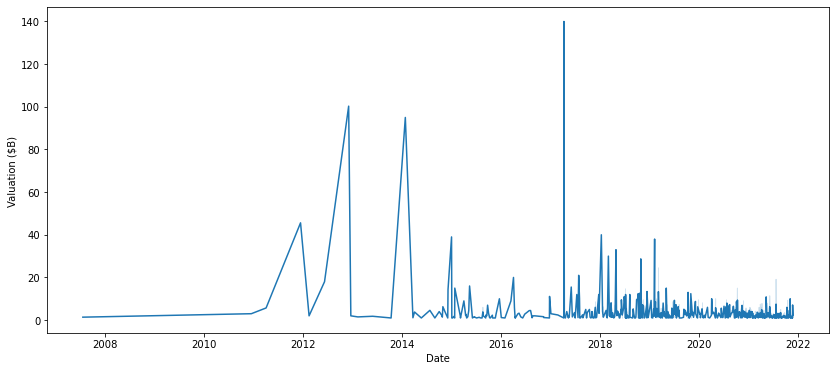

In [58]:
plt.figure(figsize=(14,6))

#plt.title("")

sns.lineplot(x='Date Added',y='Valuation ($B) ',data=df)

plt.xlabel("Date")

Top 5 investors in unicorn companies

In [64]:
df_investors1 = df_investors[['Select Investors', 'Company']].groupby(['Select Investors'], as_index = False).count()
df_investors1 = df_investors1.sort_values(ascending=False, by='Company')
df_investors1.head()

,Select Investors,Company
23,Accel,49
872,Sequoia Capital China,47
993,Tiger Global Management,41
871,Sequoia Capital,40
73,Andreessen Horowitz,38


Top 5 countries by unicorn companies

In [66]:
df_countries = df[['Country', 'Company']].groupby(['Country'], as_index = False).count()
df_countries = df_countries.sort_values(ascending=False, by='Company')
df_countries.head()

,Country,Company
43,United States,470
8,China,169
18,India,48
42,United Kingdom,34
16,Germany,22


(1, 179.23979455914207)

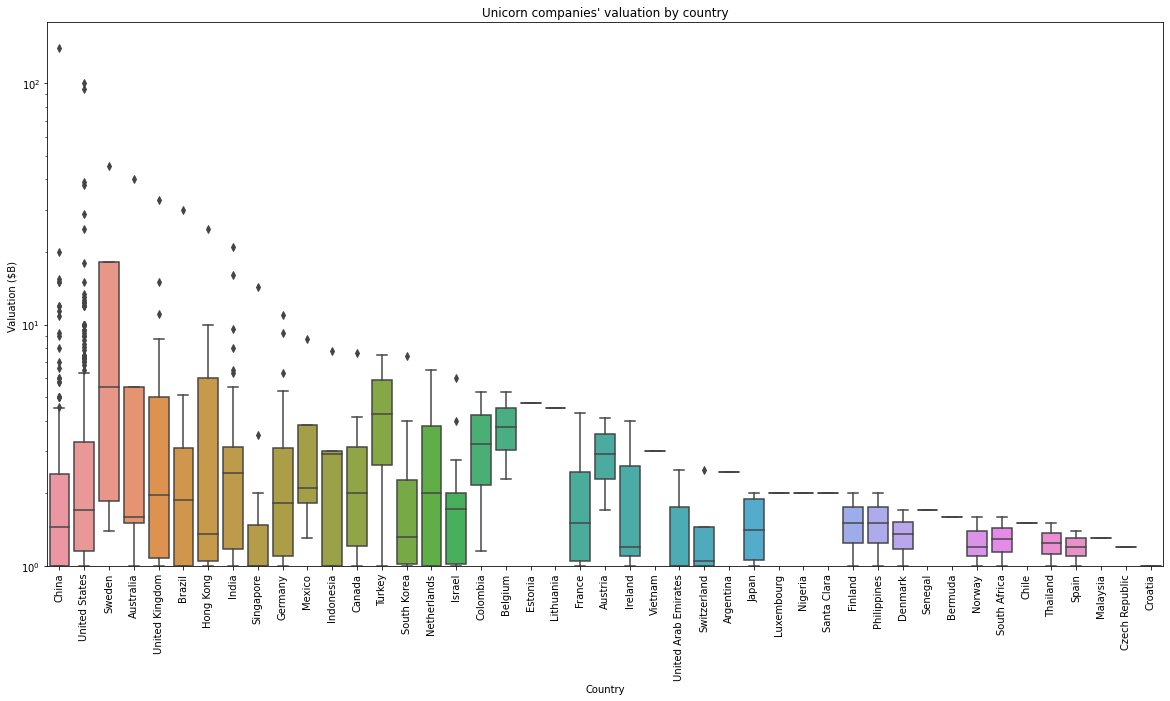

In [78]:
plt.figure(figsize=(20,10))

plt.yscale('log')

plt.xticks(rotation='vertical')

plt.title('Unicorn companies\' valuation by country')

graph = sns.boxplot(x = 'Country', y = 'Valuation ($B) ', data = df)

graph.set_ylim(1)